In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler as st
import pickle

In [ ]:
df = pd.read_csv('/content/Cleaned_Liver_disease.csv')

In [ ]:
df.head(5)

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Liver Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [ ]:
df.shape

(570, 11)

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Total Bilirubin,0
Direct Bilirubin,0
Alkaline Phosphotase,0
Alamine Aminotransferase,0
Aspartate Aminotransferase,0
Total Proteins,0
Albumin,0
Albumin and Globulin Ratio,0


<h3>🔢 Converting the Non-Numeric Column (Gender) to Numeric</h3>

<p>
The categorical <strong>Gender</strong> column was converted into numerical form to make it suitable for machine learning models.
</p>

<p>
The mapping applied was:
</p>

<pre>
Male   → 0
Female → 1
</pre>


In [ ]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

/tmp/ipython-input-1828585573.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)


<Axes: >

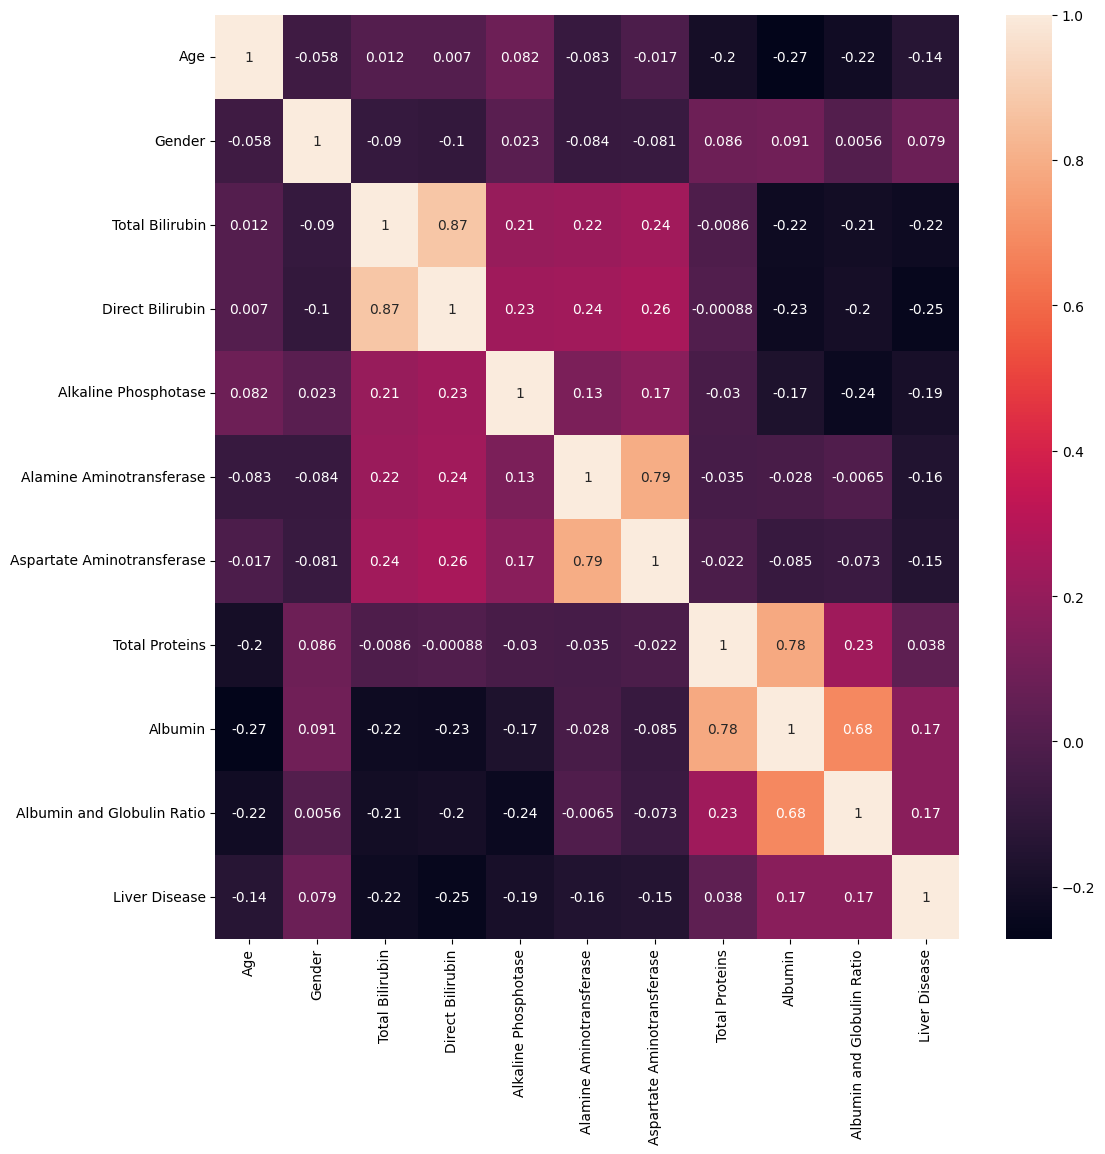

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

<h2>📉 Feature Dropping Step</h2>

<p><strong>🎯 Target column:</strong> Liver Disease</p>

<ul>
  <li>❌ <strong>Removed (low correlation):</strong>
    <ul>
      <li>Gender</li>
      <li>Total Proteins</li>
    </ul>
  </li>

  <li>⚠️ <strong>Dropped due to multicollinearity:</strong>
    <ul>
      <li>Total Bilirubin ➜ correlated with Direct Bilirubin</li>
      <li>Alamine Aminotransferase ➜ correlated with Aspartate Aminotransferase</li>
      <li>Total Proteins ➜ correlated with Albumin</li>
    </ul>
  </li>

  <li>✅ <strong>Retained features improve model performance and reduce redundancy.</strong></li>
</ul>

<h3>📌 Final Selected Features</h3>

<pre>
✔ Age
✔ Direct Bilirubin
✔ Alkaline Phosphatase
✔ Aspartate Aminotransferase
✔ Albumin
✔ Albumin and Globulin Ratio
</pre>


In [ ]:
df.drop(["Gender","Total Proteins"],axis=1,inplace=True)

In [ ]:
df.head(5)

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Albumin,Albumin and Globulin Ratio,Liver Disease
0,65,0.7,0.1,187,16,18,3.3,0.90,0
1,62,10.9,5.5,699,64,100,3.2,0.74,0
2,62,7.3,4.1,490,60,68,3.3,0.89,0
3,58,1.0,0.4,182,14,20,3.4,1.00,0
4,72,3.9,2.0,195,27,59,2.4,0.40,0


<h2>⚖️ Handling Class Imbalance</h2>

<ul>
  <li>📊 The dataset originally contained <strong>570 samples</strong>.</li>
  <li>🔼 To address class imbalance, an <strong>over-sampling technique</strong> was applied.</li>
  <li>🧪 <strong>Random Over Sampling</strong> was used to increase the dataset size.</li>
  <li>🎯 The total number of samples was increased to <strong>1000</strong>.</li>
  <li>⚖️ The target classes were balanced to ensure equal representation.</li>
</ul>

<p>✅ The final dataset size after applying the imbalance technique is <strong>(1000, n_features)</strong>.</p>


In [ ]:
input_columns = df.drop('Liver Disease',axis=1)
output_columns = df['Liver Disease']

In [ ]:
print("Before:", Counter(output_columns))

Before: Counter({0: 406, 1: 164})


In [ ]:
# Calculate new class sizes
class_counts = Counter(output_columns)
majority_class = max(class_counts, key=class_counts.get)
minority_class = min(class_counts, key=class_counts.get)


In [ ]:
sampling_strategy = {
    majority_class: 1000 // 2,
    minority_class: 1000 // 2
}

In [ ]:
# Apply Random Over Sampling
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = ros.fit_resample(input_columns, output_columns)

In [ ]:
# Creating dataset with additional data.
df_resampled = pd.concat(
    [pd.DataFrame(X_resampled, columns=input_columns.columns),
     pd.Series(y_resampled, name='Liver Disease')],
    axis=1
)

In [ ]:
df_resampled.shape

(1000, 9)

<h2>📏 Feature Scaling using StandardScaler</h2>

<ul>
  <li>🔢 Feature scaling was performed using <strong>StandardScaler</strong>.</li>
  <li>📐 StandardScaler transforms features to have:
    <ul>
      <li>Mean = 0</li>
      <li>Standard Deviation = 1</li>
    </ul>
  </li>
  <li>⚖️ This ensures all features are on the same scale.</li>
  <li>🚀 Scaling improves the performance of distance-based and gradient-based models.</li>
</ul>

<p><strong>Formula used:</strong></p>

<pre>
z = (x − μ) / σ
</pre>

<p>✅ StandardScaler was applied only to the <strong>feature variables</strong>, not the target column.</p>


In [ ]:
Scalar = st()
input_columns = pd.DataFrame(Scalar.fit_transform(df_resampled.drop('Liver Disease',axis=1)), columns=df_resampled.drop('Liver Disease',axis=1).columns)
input_columns.head(5)

,Age,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Albumin,Albumin and Globulin Ratio
0,1.282979,-0.372435,-0.430024,-0.378625,-0.317426,-0.268224,0.111992,-0.229274
1,1.100522,1.501311,1.665382,1.955614,-0.031016,0.028520,-0.013700,-0.741665
2,1.100522,0.839989,1.122129,1.002770,-0.054883,-0.087282,0.111992,-0.261299
3,0.857245,-0.317324,-0.313612,-0.401421,-0.329360,-0.260986,0.237684,0.090970
4,1.708713,0.215407,0.307249,-0.342153,-0.251791,-0.119852,-1.019237,-1.830495


<h2>📊 Model Selection for Classification</h2>

<ul>
  <li>🤖 Multiple classification models were evaluated.</li>
  <li>🧪 <strong>GridSearchCV</strong> was used for hyperparameter tuning.</li>
  <li>🔁 5-fold cross-validation was applied.</li>
  <li>📈 Models were evaluated using classification metrics.</li>
</ul>

<h3>📌 Models Used</h3>

<ul>
  <li>Logistic Regression</li>
  <li>Support Vector Machine (SVM)</li>
  <li>Random Forest Classifier</li>
</ul>

<h3>🏆 Evaluation Criteria</h3>

<ul>
  <li>Accuracy</li>
  <li>Precision</li>
  <li>Recall</li>
  <li>F1-Score</li>
</ul>

<p>
The model with the best overall classification performance and optimal hyperparameters was selected as the final model.
</p>


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    input_columns,df_resampled['Liver Disease'], test_size=0.2, random_state=42, stratify=df_resampled['Liver Disease']
)


In [ ]:
lr = LogisticRegression(max_iter=1000)

lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='f1')
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']},
             scoring='f1')

In [ ]:

svm = SVC()

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='f1')
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='f1')

In [ ]:

rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [ ]:

models = {
    "Logistic Regression": lr_grid,
    "SVM": svm_grid,
    "Random Forest": rf_grid
}

for name, model in models.items():
    y_pred = model.best_estimator_.predict(X_test)
    print(f"\n{name}")
    print("Best Parameters:", model.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Logistic Regression
Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.82      0.61      0.70       100
           1       0.69      0.87      0.77       100

    accuracy                           0.74       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.76      0.74      0.74       200


SVM
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       100
           1       0.66      0.94      0.78       100

    accuracy                           0.73       200
   macro avg       0.78      0.73      0.72       200
weighted avg       0.78      0.73      0.72       200


Random Forest
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     

<h2>🏆 Best Model Selection (Classification)</h2>

<ul>
  <li>Three classification models were evaluated:
    <ul>
      <li>Logistic Regression</li>
      <li>Support Vector Machine (SVM)</li>
      <li>Random Forest Classifier</li>
    </ul>
  </li>

  <li>Models were compared using accuracy, precision, recall, and F1-score.</li>

  <li>
    <strong>Random Forest Classifier</strong> achieved the best performance:
    <ul>
      <li>Accuracy: 97.5%</li>
      <li>Balanced precision and recall for both classes</li>
      <li>Highest F1-score</li>
    </ul>
  </li>
</ul>

<p>
✅ Therefore, <strong>Random Forest</strong> was selected as the final model for liver disease classification.
</p>


In [ ]:
y_pre = rf_grid.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       100
           1       0.96      0.99      0.98       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



### Store model and scaler object in pickel file

In [ ]:
# Save the scaler
with open('standard_scaler.pkl', 'wb') as f:
    pickle.dump(Scalar, f)


In [ ]:
# Save the trained model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_grid.best_estimator_, f)


In [ ]:
from sklearn.pipeline import Pipeline
import joblib

trained_pipeline = Pipeline([
    ('scaler', Scalar),      # already fitted
    ('model', rf_grid.best_estimator_)      # already trained
])


In [ ]:
joblib.dump(trained_pipeline, "Cleaned_Liver_disease.pkl")
print("Pipeline saved successfully")


Pipeline saved successfully
